In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_excel('data.xlsx')
print(df.head())

    Moisture  rainfall  Average Humidity  Mean Temp  max Temp  Min temp  \
0  12.801685  0.012360                57         62        71        52   
1  12.851654  0.004172                57         58        73        43   
2  12.776773  0.000000                56         58        69        46   
3  12.942001  0.031747                62         56        70        43   
4  12.984652  0.000000                65         56        70        42   

   alkaline  sandy  chalky  clay  millet yield  Outcomes  
0         0      1       0     0             2         1  
1         0      1       0     0             0         1  
2         0      0       1     0             4         0  
3         0      1       0     0             0         1  
4         0      0       0     1             1         0  


In [3]:
print(df.describe())

         Moisture    rainfall  Average Humidity  Mean Temp    max Temp  \
count  800.000000  800.000000        800.000000  800.00000  800.000000   
mean    12.903866    0.066509         49.601250   76.50375   89.073750   
std      0.099445    0.091065         18.283602   11.70657   11.183118   
min     12.547993    0.000000         10.000000   52.00000   60.000000   
25%     12.833139    0.000000         37.000000   68.00000   81.000000   
50%     12.910599    0.017919         49.000000   79.00000   90.000000   
75%     12.973614    0.105211         62.000000   86.00000   97.000000   
max     13.183391    0.369133        100.000000  102.00000  112.000000   

         Min temp    alkaline       sandy      chalky       clay  \
count  800.000000  800.000000  800.000000  800.000000  800.00000   
mean    63.915000    0.343750    0.321250    0.047500    0.28750   
std     13.060187    0.475256    0.467249    0.212839    0.45288   
min     36.000000    0.000000    0.000000    0.000000    0.00

In [4]:
print(df.isnull().sum())

Moisture            0
rainfall            0
Average Humidity    0
Mean Temp           0
max Temp            0
Min temp            0
alkaline            0
sandy               0
chalky              0
clay                0
millet yield        0
Outcomes            0
dtype: int64


In [5]:
X=df[['Moisture','rainfall','Average Humidity','Mean Temp','max Temp','Min temp','alkaline','sandy','chalky','clay']]
Y=df[['millet yield']]

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
model=RandomForestRegressor()

model.fit(X_train,Y_train)


C:\Users\vrsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [8]:
Y_pred=model.predict(X_test)

In [9]:
Y_pred

array([4.  , 3.04, 1.  , 0.13, 1.01, 0.97, 1.  , 0.  , 0.19, 2.  , 0.08,
       4.  , 0.  , 1.  , 4.  , 0.  , 0.  , 0.  , 0.02, 0.  , 4.  , 4.  ,
       1.  , 3.96, 1.  , 0.99, 4.  , 4.  , 4.  , 0.  , 4.  , 1.02, 1.  ,
       0.64, 1.  , 0.  , 0.02, 4.  , 2.  , 0.07, 1.99, 4.  , 1.  , 4.  ,
       1.56, 0.08, 1.99, 0.82, 1.  , 4.  , 4.  , 1.97, 4.  , 1.01, 0.  ,
       0.26, 2.  , 4.  , 0.  , 0.  , 2.  , 1.5 , 4.  , 4.  , 3.89, 0.  ,
       1.93, 1.98, 3.76, 2.  , 4.  , 1.  , 1.99, 0.  , 1.14, 4.  , 4.  ,
       2.  , 3.38, 0.  , 0.  , 0.  , 0.  , 2.  , 0.04, 0.  , 0.  , 4.  ,
       1.96, 2.  , 3.97, 1.02, 4.  , 0.  , 4.  , 0.02, 4.  , 1.99, 1.99,
       0.  , 0.11, 0.21, 4.  , 3.3 , 2.  , 1.  , 0.99, 0.  , 4.  , 4.  ,
       2.  , 0.06, 2.  , 1.32, 0.67, 2.  , 0.82, 1.36, 4.  , 0.  , 4.  ,
       1.59, 0.  , 1.  , 1.  , 4.  , 0.02, 1.2 , 0.05, 4.  , 4.  , 4.  ,
       0.  , 1.  , 4.  , 1.  , 1.72, 1.  , 4.  , 0.02, 4.  , 3.04, 2.  ,
       4.  , 0.96, 0.  , 2.  , 3.82, 2.  , 0.02, 3.

In [10]:
# calculaate mean squared error
mse=mean_squared_error(Y_test,Y_pred)
print(f"Mean squared error {mse}")
#calculate R squared value
r2=r2_score(Y_test,Y_pred)
print(f"R squared :{r2}")

Mean squared error 0.11860937499999999
R squared :0.954209708796429


In [11]:
print("Training R^2:", model.score(X_train, Y_train))
print("Test R^2:", model.score(X_test, Y_test))


Training R^2: 0.9934795413580092
Test R^2: 0.954209708796429


In [12]:

import joblib
#Save the model to the file 
joblib.dump(model,'Millet yield pred.joblib')

['Millet yield pred.joblib']

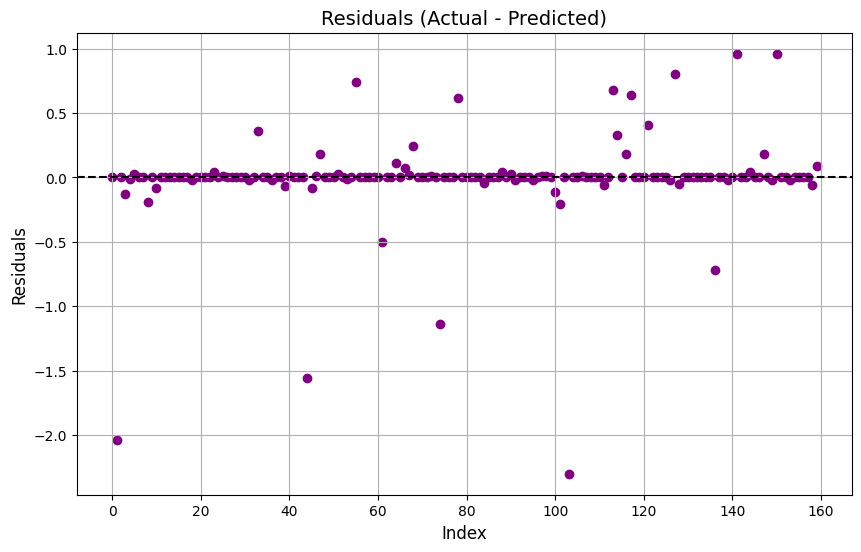

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure alignment of Y_test and Y_pred
Y_test = np.array(Y_test).flatten()
Y_pred = np.array(Y_pred).flatten()

# Calculate residuals
residuals = Y_test - Y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()
